In [61]:
# Import libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import LabelEncoder,MinMaxScaler,StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,AdaBoostClassifier,BaggingClassifier
from xgboost import XGBClassifier

In [2]:
# Loading Train data

train = pd.read_csv('train_ctrUa4K.csv')
print("Shape of train data :",train.shape)
train.head()

Shape of train data : (614, 13)


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [3]:
# Loading Test data

test = pd.read_csv('test_lAUu6dG.csv')
print("Shape of test data :",test.shape)
test.head()

Shape of test data : (367, 12)


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


# Data Exploration

In [4]:
# Data info

train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
Loan_ID              614 non-null object
Gender               601 non-null object
Married              611 non-null object
Dependents           599 non-null object
Education            614 non-null object
Self_Employed        582 non-null object
ApplicantIncome      614 non-null int64
CoapplicantIncome    614 non-null float64
LoanAmount           592 non-null float64
Loan_Amount_Term     600 non-null float64
Credit_History       564 non-null float64
Property_Area        614 non-null object
Loan_Status          614 non-null object
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [5]:
# Statistics of numerical columns

train.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [6]:
# Variable Identification

def cat_cols(dataframe):
    return dataframe.select_dtypes(include='object').columns.tolist()

# Variable Identification

def num_cols(dataframe):
    return dataframe.select_dtypes(include='number').columns.tolist()

print("Categorical Columns :\n",cat_cols(train))
print("\nNumerical Columns :\n",num_cols(train))


Categorical Columns :
 ['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area', 'Loan_Status']

Numerical Columns :
 ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History']


In [7]:
# Univariate Analysis

for i in cat_cols(train):
    print("{0} :\n\n {1}".format(i,train[i].value_counts()))
    print("\n********************\n")

Loan_ID :

 LP002116    1
LP002912    1
LP002502    1
LP001144    1
LP001692    1
           ..
LP002634    1
LP001384    1
LP002587    1
LP002266    1
LP002098    1
Name: Loan_ID, Length: 614, dtype: int64

********************

Gender :

 Male      489
Female    112
Name: Gender, dtype: int64

********************

Married :

 Yes    398
No     213
Name: Married, dtype: int64

********************

Dependents :

 0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64

********************

Education :

 Graduate        480
Not Graduate    134
Name: Education, dtype: int64

********************

Self_Employed :

 No     500
Yes     82
Name: Self_Employed, dtype: int64

********************

Property_Area :

 Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64

********************

Loan_Status :

 Y    422
N    192
Name: Loan_Status, dtype: int64

********************



In [8]:
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


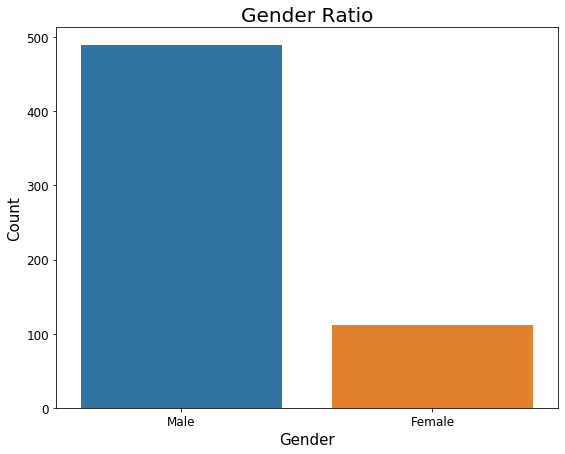

In [9]:
# Gender Ratio

plt.figure(figsize=[9,7])
sns.countplot(train.Gender)
plt.title("Gender Ratio",fontsize=20)
plt.xlabel("Gender",fontsize=15)
plt.ylabel("Count",fontsize=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12);

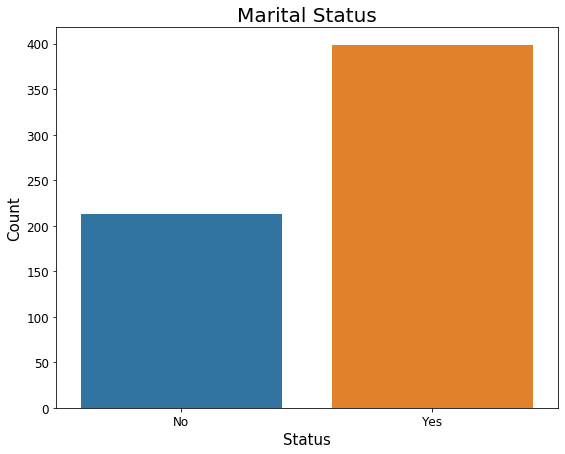

In [10]:
# Marital Status Bar Chart

plt.figure(figsize=[9,7])
sns.countplot(train.Married)
plt.title("Marital Status",fontsize=20)
plt.xlabel("Status",fontsize=15)
plt.ylabel("Count",fontsize=15);
plt.xticks(fontsize=12)
plt.yticks(fontsize=12);

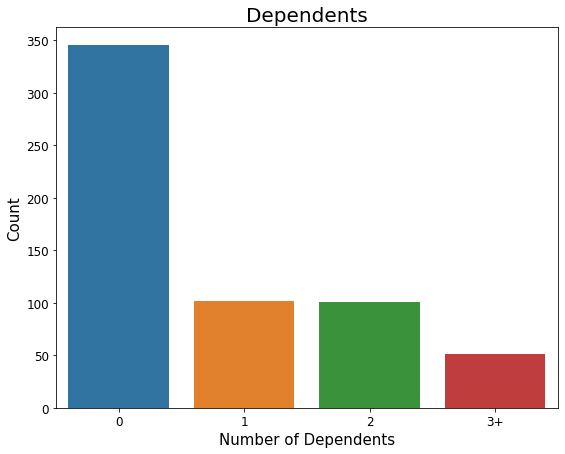

In [11]:
# Number of Dependents

plt.figure(figsize=[9,7])
sns.countplot(train.Dependents)
plt.title("Dependents",fontsize=20)
plt.xlabel("Number of Dependents",fontsize=15)
plt.ylabel("Count",fontsize=15);
plt.xticks(fontsize=12)
plt.yticks(fontsize=12);

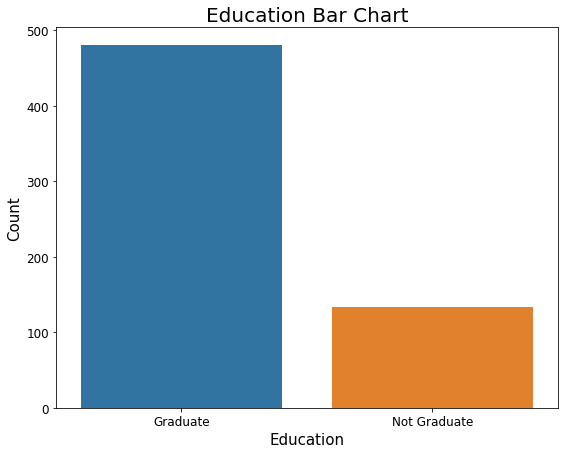

In [12]:
# Education

plt.figure(figsize=[9,7])
sns.countplot(train.Education)
plt.title("Education Bar Chart",fontsize=20)
plt.xlabel("Education",fontsize=15)
plt.ylabel("Count",fontsize=15);
plt.xticks(fontsize=12)
plt.yticks(fontsize=12);

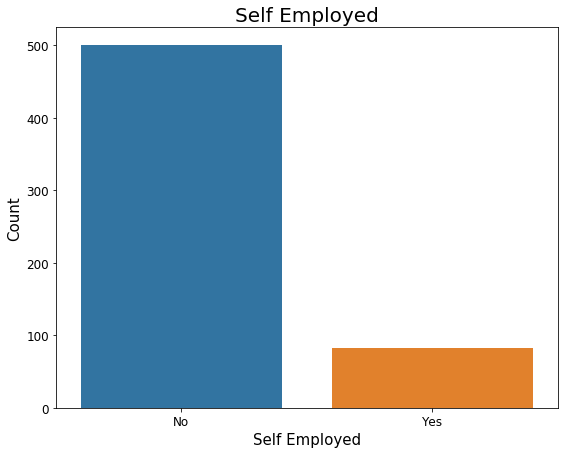

In [13]:
# Self Employed

plt.figure(figsize=[9,7])
sns.countplot(train['Self_Employed'])
plt.title("Self Employed",fontsize=20)
plt.xlabel("Self Employed",fontsize=15)
plt.ylabel("Count",fontsize=15);
plt.xticks(fontsize=12)
plt.yticks(fontsize=12);

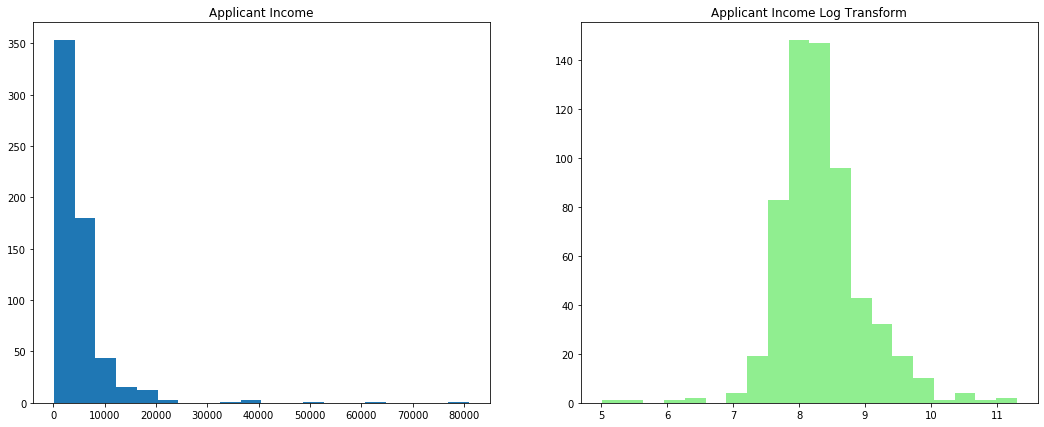

In [14]:
# Applicant Income

fig, (ax1,ax2) = plt.subplots(1,2,figsize=[18,7])
ax1.hist(train.ApplicantIncome,bins=20)
ax1.title.set_text("Applicant Income")
ax2.hist(np.log(train.ApplicantIncome),bins=20,color='lightgreen');
ax2.title.set_text("Applicant Income Log Transform")

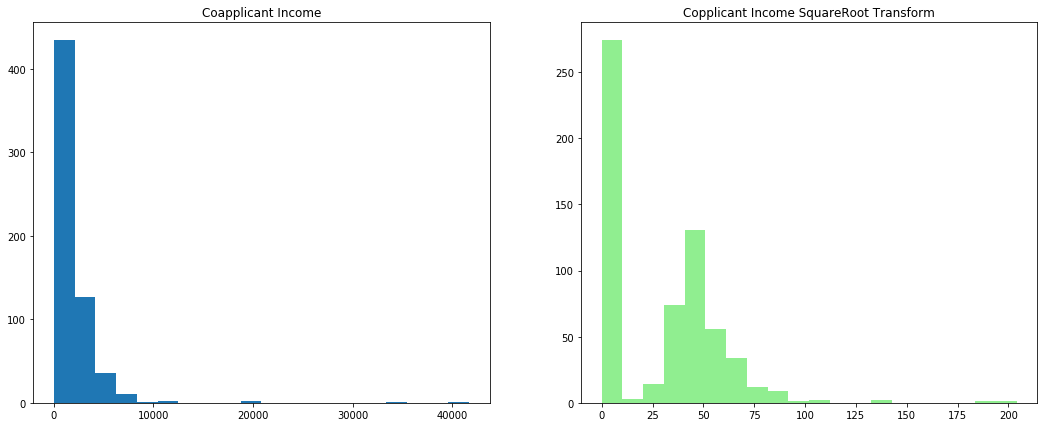

In [15]:
# Coapplicant Income

fig, (ax1,ax2) = plt.subplots(1,2,figsize=[18,7])
ax1.hist(train.CoapplicantIncome,bins=20)
ax1.title.set_text("Coapplicant Income")
ax2.hist(np.sqrt(train.CoapplicantIncome),bins=20,color='lightgreen');
ax2.title.set_text("Copplicant Income SquareRoot Transform")

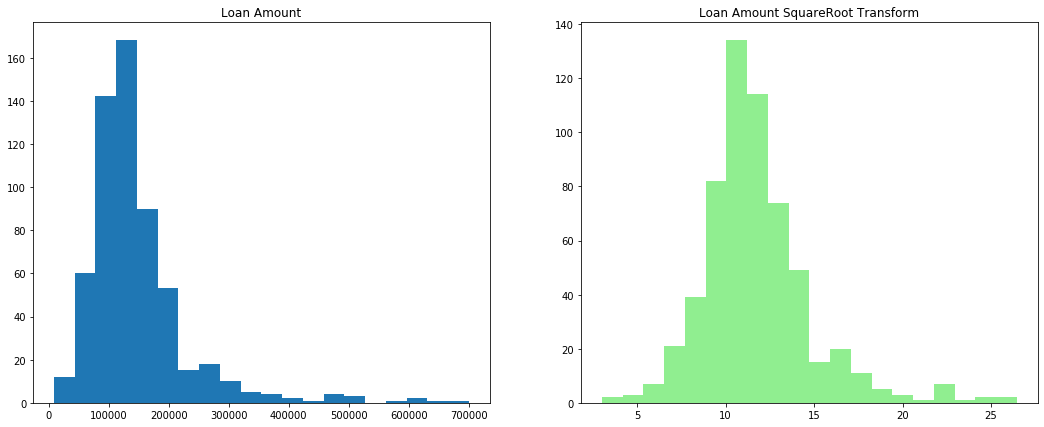

In [16]:
fig, (ax1,ax2) = plt.subplots(1,2,figsize=[18,7])
ax1.hist(train.LoanAmount*1000,bins=20)
ax1.title.set_text("Loan Amount")
ax2.hist(np.sqrt(train.LoanAmount),bins=20,color='lightgreen');
ax2.title.set_text("Loan Amount SquareRoot Transform")

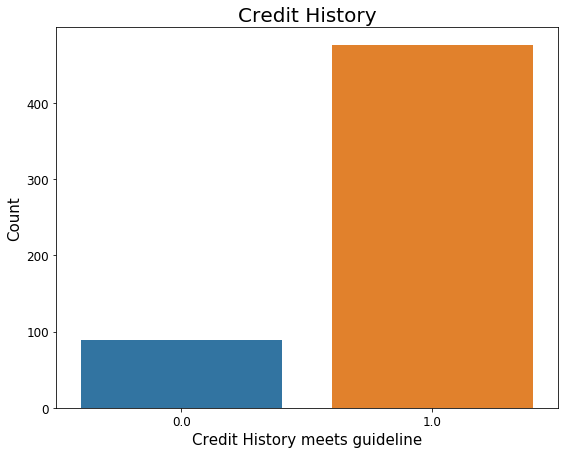

In [17]:
# Credit History

plt.figure(figsize=[9,7])
sns.countplot(train['Credit_History'])
plt.title("Credit History",fontsize=20)
plt.xlabel("Credit History meets guideline",fontsize=15)
plt.ylabel("Count",fontsize=15);
plt.xticks(fontsize=12)
plt.yticks(fontsize=12);

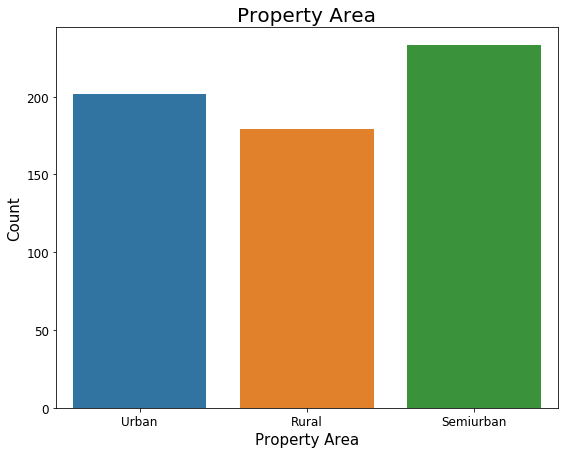

In [18]:
# Property Area

plt.figure(figsize=[9,7])
sns.countplot(train.Property_Area)
plt.title("Property Area",fontsize=20)
plt.xlabel("Property Area",fontsize=15)
plt.ylabel("Count",fontsize=15);
plt.xticks(fontsize=12)
plt.yticks(fontsize=12);

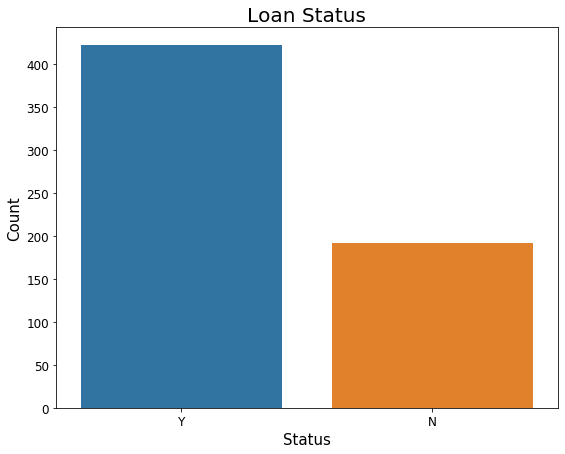

In [19]:
# Target Variable

plt.figure(figsize=[9,7])
sns.countplot(train.Loan_Status)
plt.title("Loan Status",fontsize=20)
plt.xlabel("Status",fontsize=15)
plt.ylabel("Count",fontsize=15);
plt.xticks(fontsize=12)
plt.yticks(fontsize=12);

In [20]:
# Bivariate Analysis

train.corr()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
ApplicantIncome,1.000000,-0.116605,0.570909,-0.045306,-0.014715
CoapplicantIncome,-0.116605,1.000000,0.188619,-0.059878,-0.002056
LoanAmount,0.570909,0.188619,1.000000,0.039447,-0.008433
Loan_Amount_Term,-0.045306,-0.059878,0.039447,1.000000,0.001470
Credit_History,-0.014715,-0.002056,-0.008433,0.001470,1.000000


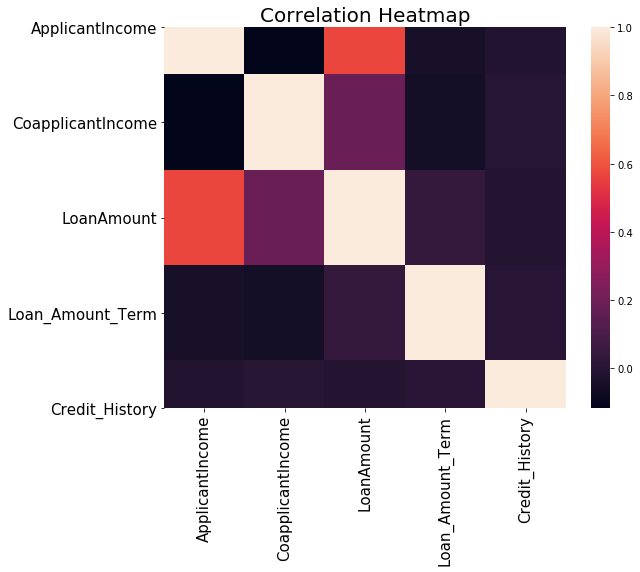

In [21]:
# Correlation Heatmap 

plt.figure(figsize=[9,7])
sns.heatmap(train.corr())
plt.title("Correlation Heatmap",fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15);

In [22]:
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


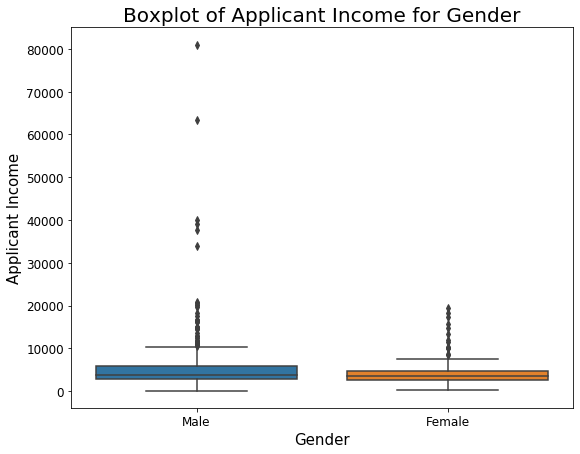

In [23]:
# Boxplot for Gender vs Income

plt.figure(figsize=[9,7])
sns.boxplot(train.Gender,train.ApplicantIncome)
plt.title("Boxplot of Applicant Income for Gender",fontsize=20)
plt.xlabel('Gender',fontsize=15)
plt.ylabel('Applicant Income',fontsize=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12);

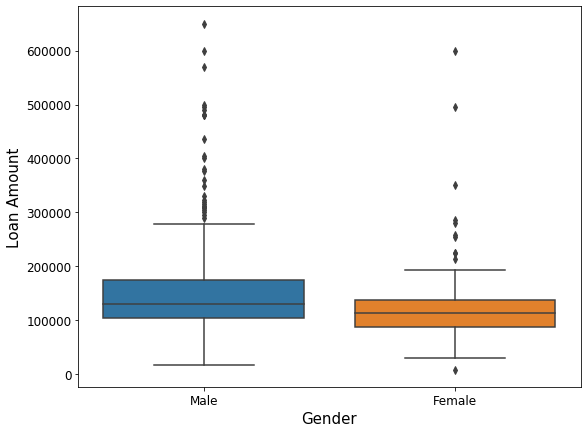

In [24]:
# Boxplot for Loan Amount vs Gender

plt.figure(figsize=[9,7])
sns.boxplot(train.Gender,train.LoanAmount*1000)
plt.xlabel('Gender',fontsize=15)
plt.ylabel('Loan Amount',fontsize=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12);

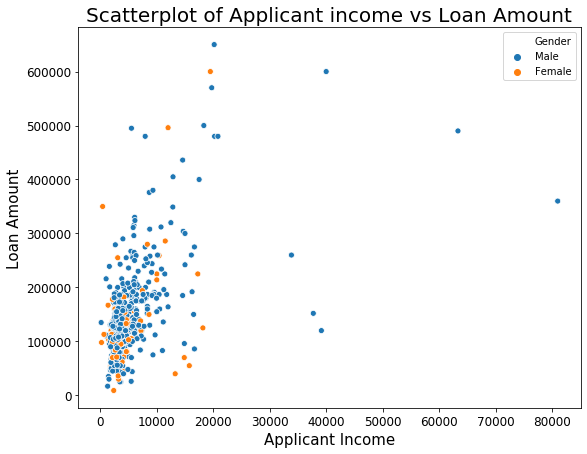

In [25]:
# ScatterPlot for Applicant Income vs Loan Amount

plt.figure(figsize=[9,7])
sns.scatterplot('ApplicantIncome',train['LoanAmount']*1000,data=train,hue='Gender')
plt.title("Scatterplot of Applicant income vs Loan Amount",fontsize=20)
plt.xlabel('Applicant Income',fontsize=15)
plt.ylabel('Loan Amount',fontsize=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12);

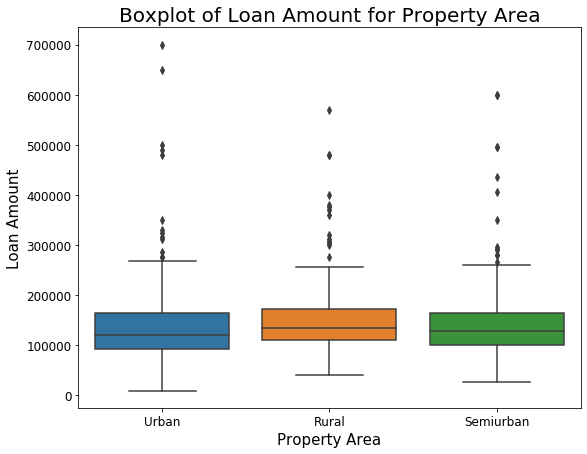

In [26]:
# Boxplot of Property Area vs Loan Amount

plt.figure(figsize=[9,7])
sns.boxplot(train.Property_Area,train.LoanAmount*1000)
plt.title("Boxplot of Loan Amount for Property Area",fontsize=20)
plt.xlabel('Property Area',fontsize=15)
plt.ylabel('Loan Amount',fontsize=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12);

## Missing Values

In [27]:
# Missing Values

def missing_values(dataframe):
    counts = dataframe.isnull().sum()
    percent = dataframe.isnull().sum()/dataframe.shape[0]*100
    return pd.DataFrame({"Count":counts,"Percntage":percent},index=dataframe.isnull().sum().index)

missing_values(train)

,Count,Percntage
Loan_ID,0,0.000000
Gender,13,2.117264
Married,3,0.488599
Dependents,15,2.442997
Education,0,0.000000
Self_Employed,32,5.211726
ApplicantIncome,0,0.000000
CoapplicantIncome,0,0.000000
LoanAmount,22,3.583062
Loan_Amount_Term,14,2.280130


### Impute Value

Gender = mode()

Married = mode()

Dependents = mode()

Self Employed = mode()

Loan Amount = Male.mean(),female.mean()

Loan Amount Term = mode()

Credit History = mode()

In [28]:
# Impute Missing values

male_index = train[(train['LoanAmount'].isnull()) & (train['Gender']=='Male')].index
female_index = train[(train['LoanAmount'].isnull()) & (train['Gender']=='Female')].index

In [38]:
# Imputing missing values

train.Gender = train.Gender.fillna(train.Gender.mode()[0])
train.Married = train.Married.fillna(train.Married.mode()[0])
train.Dependents = train.Dependents.fillna(train.Dependents.mode()[0])
train.Self_Employed = train.Self_Employed.fillna(train.Self_Employed.mode()[0])
train.Loan_Amount_Term = train.Loan_Amount_Term.fillna(train.Loan_Amount_Term.mode()[0])
train.Credit_History = train.Credit_History.fillna(train.Credit_History.mode()[0])

# Loan Amount

train.loc[male_index,'LoanAmount'] = 151.0
train.loc[female_index,'LoanAmount'] = 127.0

missing_values(train)

,Count,Percntage
Loan_ID,0,0.0
Gender,0,0.0
Married,0,0.0
Dependents,0,0.0
Education,0,0.0
Self_Employed,0,0.0
ApplicantIncome,0,0.0
CoapplicantIncome,0,0.0
LoanAmount,0,0.0
Loan_Amount_Term,0,0.0


## Outlier Treatment

In [39]:
# Function to detect outliers in every feature

def detect_outliers(dataframe):
    cols = list(dataframe)
    outliers = pd.DataFrame(columns=['Feature','Number of Outliers'])
    
    for column in cols:
        if column in dataframe.select_dtypes(include=np.number).columns:
            # first quartile (Q1)
            q1 = dataframe[column].quantile(0.25) 
            
            # third quartile (Q3)
            q3 = dataframe[column].quantile(0.75)
            
            # IQR
            iqr = q3 - q1
            
            fence_low = q1 - (1.5*iqr)
            fence_high = q3 + (1.5*iqr)
            outliers = outliers.append({'Feature':column,'Number of Outliers':dataframe.loc[(dataframe[column] < fence_low) | (dataframe[column] > fence_high)].shape[0]},ignore_index=True)
    return outliers

detect_outliers(train)


,Feature,Number of Outliers
0,ApplicantIncome,50
1,CoapplicantIncome,18
2,LoanAmount,41
3,Loan_Amount_Term,88
4,Credit_History,89


## Variable Transformation

In [42]:
# Transforming skewed columns

train.ApplicantIncome = np.log(train.ApplicantIncome)
train.CoapplicantIncome = np.sqrt(train.CoapplicantIncome)
train.LoanAmount = np.sqrt(train.LoanAmount)

train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,8.674026,0.000000,12.288206,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,8.430109,38.832976,11.313708,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,8.006368,0.000000,8.124038,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,7.856707,48.559242,10.954451,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,8.699515,0.000000,11.874342,360.0,1.0,Urban,Y


## Preprocessing

In [50]:
# Splitting Data into features and target

X = train.drop('Loan_ID',axis=1).iloc[:,:-1]
y = train.Loan_Status

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=0)

In [58]:
# Label Encoding

cols_to_encode = X_train.select_dtypes(include='object').columns.tolist()

le = LabelEncoder()

for i in cols_to_encode:
    X_train[i] = le.fit_transform(X_train[i])
    X_test[i] = le.transform(X_test[i])
    

In [59]:
# Scaling data

minmax = MinMaxScaler()

X_train_scaled = minmax.fit_transform(X_train)
X_test_scaled = minmax.transform(X_test)

## Training Models

In [70]:
# Logistic Regression

lr = LogisticRegression(C=1)
lr.fit(X_train_scaled,y_train)
lr.score(X_test_scaled,y_test)

0.8311688311688312

In [77]:
# Decision Tree Classifier

dt_clf = DecisionTreeClassifier(max_depth=2)
dt_clf.fit(X_train_scaled,y_train)
dt_clf.score(X_test_scaled,y_test)

0.8311688311688312

In [89]:
# Random Forest Classifier

rf_clf = RandomForestClassifier(max_depth=2)
rf_clf.fit(X_train,y_train)
rf_clf.score(X_test,y_test)

0.8311688311688312

In [96]:
# XGBoost Classifier

xgb = XGBClassifier(max_depth=2)
xgb.fit(X_train,y_train)
xgb.score(X_test,y_test)

0.8376623376623377

In [123]:
# GradientBoost

gb = GradientBoostingClassifier(n_estimators=50,learning_rate=0.1)
gb.fit(X_train_scaled,y_train)
gb.score(X_test_scaled,y_test)

0.8246753246753247

In [129]:
# SVM

svc = SVC(kernel='linear',C=0.05)
svc.fit(X_train_scaled,y_train)
svc.score(X_test_scaled,y_test)

0.8311688311688312